In [3]:
# Sets the path to allow the import of Data_Analysis.py
import sys
sys.path.append("../scripts/")
from Data_Analysis import *
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
### Creates a defense class which allows the ability to look at game data ###
monsters = Defense("CHI")
monsters.stats["2014"]["1"]

{'FGAtt': 3.0,
 'FGBlk': 0.0,
 'FGM': 3.0,
 'Home': True,
 'PassAtt': 22.0,
 'PassTD': 1.0,
 'PassYds': 173.0,
 'Players': [(' EJ Manuel', 'QB'),
  (' Bryce Brown', 'RB'),
  (' Anthony Dixon', 'RB'),
  (' Fred Jackson', 'RB'),
  (' C.J. Spiller', 'RB'),
  (' Marcus Easley', 'WR'),
  (' Marquise Goodwin', 'WR'),
  (' Chris Hogan', 'WR'),
  (' Sammy Watkins', 'WR'),
  (' Robert Woods', 'WR'),
  (' Scott Chandler', 'TE'),
  (' Chris Gragg', 'TE'),
  (' Lee Smith', 'TE'),
  (' Dan Carpenter', 'K'),
  (' Jordan Gay', 'K')],
 'Rival': 0.0,
 'RushAtt': 33.0,
 'RushTD': 1.0,
 'RushYds': 193.0,
 'Score': 0.0}

In [9]:
#### Testing the average and variance functions ###
luck = QuarterBack(" Andrew Luck")
stafford = QuarterBack(" Matthew Stafford")
forte = RunningBack(" Matt Forte")

avg1 = luck.ppg_average("2014")
var1 = np.sqrt(luck.ppg_var("2014")[0])
print "Andrew Luck averaged %.2f points per game with a std of %.2f points per game" % (avg1,var1)

avg2 = stafford.ppg_average("2014")
var2 = np.sqrt(stafford.ppg_var("2014")[0])
print "Matt Stafford averaged %.2f points per game with a Std of %.2f points per game" % (avg2,var2)

avg3 = forte.ppg_average("2014")
var3 = np.sqrt(forte.ppg_var("2014")[0])
print "Matt Forte averaged %.2f points per game with a std of %.2f points per game" % (avg3,var3)

Andrew Luck averaged 21.98 points per game with a std of 8.06 points per game
Matt Stafford averaged 15.60 points per game with a Std of 7.28 points per game
Matt Forte averaged 18.23 points per game with a std of 7.64 points per game


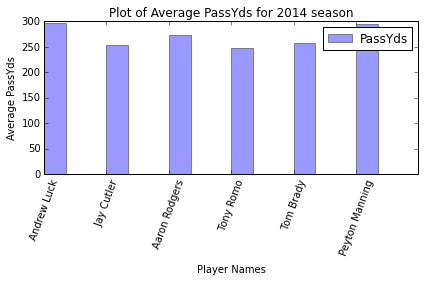

In [15]:
### Using Plots to visualize player comparisons ###
player_list=[(" Andrew Luck"),(" Jay Cutler"),\
             (" Aaron Rodgers"),(" Tony Romo"),\
             (" Tom Brady"),(" Peyton Manning")]
year ="2014"
field = "PassYds"

class_list = [QuarterBack(ii) for ii in player_list]


means = tuple(player.field_average(field,year) for player in class_list)
ticks = tuple(name for name in player_list)
fig, ax = plt.subplots()

index = np.arange(len(player_list))
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects = plt.bar(index, means, bar_width,
                 alpha=opacity,
                 color='b',
                 label=field)

plt.xlabel("Player Names")
plt.ylabel("Average %s"%field)
plt.title("Plot of Average %s for %s season"%(field,year))
plt.xticks(index, ticks,rotation=70)
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
### Example of how we might produce rankings of players according to certain statistics ###
qb_list = generate_player_list("QB")

class_list = [QuarterBack(player) for player in qb_list]

ppg_avg_dict={}
ppg_std_dict={}
year = "2014"
for player in class_list:
    average = player.ppg_average(year)
    (variance,games_played) = player.ppg_var(year)
    ppg_avg_dict[player.name] = average
    
    if type(variance) == str:
        continue
    elif games_played < 12:
        continue
    else:
        ppg_std_dict[player.name]= np.sqrt(variance)

number=10 #how many players to rank
ppg_average_rankings = sorted(ppg_avg_dict,key=ppg_avg_dict.get,reverse=True)     
ppg_std_rankings=sorted(ppg_std_dict,key=ppg_std_dict.get,reverse=False)      

# Top ten rankings in 2014 average points per game and standard deviation
x=1
width = max(len(name) for name in ppg_average_rankings[:number])+15

print "{title:^00s} in {y:<0}".format(title="Top 10 rankings",y=year),"\n"
print "       {ppg:2} {std:>32s}".format(ppg="Average Points Per Game",std="Standard Deviation")

for i,j in zip(ppg_average_rankings[:number],ppg_std_rankings[:number]):
    string1 = "{name1}-{ppg:.2f}".format(name1=i,ppg=ppg_avg_dict[i])
    string2 = "{name2}-{std:.2f}".format(name2=j,std=ppg_std_dict[j])
    rank = "{}.".format(x)
    print "".join(rank.ljust(3)),"".join(string1.ljust(width)),"".join(rank.ljust(3)),string2    
    x+=1

Top 10 rankings in 2014 

       Average Points Per Game               Standard Deviation
1.   Aaron Rodgers-22.01               1.   Blake Bortles-4.39
2.   Andrew Luck-21.98                 2.   Alex Smith-4.70
3.   Russell Wilson-20.37              3.   Teddy Bridgewater-5.22
4.   Peyton Manning-19.29              4.   Brian Hoyer-5.42
5.   Drew Brees-18.93                  5.   Drew Brees-6.02
6.   Ben Roethlisberger-18.80          6.   Jay Cutler-6.03
7.   Tony Romo-17.75                   7.   Derek Carr-6.06
8.   Cam Newton-17.64                  8.   Tony Romo-6.22
9.   Matt Ryan-17.64                   9.   Ryan Tannehill-6.30
10.  Ryan Tannehill-17.43              10.  Matt Ryan-6.66


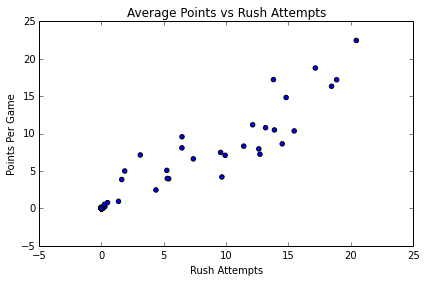

The correlation value is 0.963144898064


In [21]:
### First exposure with correlation between to variables ###

# Create a list of Classes for all Running Backs
rb_list = generate_player_list("RB")

class_list = [RunningBack(player) for player in rb_list]

# Get average points per game to compare with average rush attempts per game
year = "2010"
xy_list = [(player.field_average("RushAtt",year),player.ppg_average(year)) for player in class_list]

#Plots of the Data Points
pts = [xy_list[i][1] for i in range(len(xy_list))]
rushatt = [xy_list[i][0] for i in range(len(xy_list))]
fig, ax = plt.subplots()


plt.scatter(rushatt,pts)

plt.xlabel("Rush Attempts")
plt.ylabel("Points Per Game")
plt.title("Average Points vs Rush Attempts")


plt.tight_layout()
plt.show()

# Generate the Correlation Coefficient x refers to rush attempts and y refers to points
N = len(pts)
x = np.array([xy_list[i][0] for i in range(N)])
y = np.array([xy_list[i][1] for i in range(N)])
x_sum = np.sum(x)
y_sum = np.sum(y)
xx_sum = np.sum(x**2)
yy_sum = np.sum(y**2)
xy_sum = np.sum(x*y)

numerator = N*xy_sum -x_sum*y_sum
denominator = np.sqrt((N*xx_sum-x_sum**2)*(N*yy_sum-y_sum**2))

r = numerator/denominator
print "The correlation value is %s"%r